<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S7_3_1_Custom_Traing_with_Iris_SOLUTIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Custom Training with Iris

Nous allons cette fois sortir de Keras pour notre boucle d'entrainement. Nous allons créer un réseau de neurones classique qui va pouvoir classer les différentes fleurs Iris. 

* Importez les librairies suivantes : 
    * os 
    * matplotlib.pyplot 
    * tensorflow 2.0

In [0]:
!pip install tensorflow-gpu==2.0.0beta1
import tensorflow as tf 
import matplotlib.pyplot as plt 
import os 

* Nous allons importer Iris depuis le dataset public que Google Cloud. Utilisez la fonction [`tf.keras.utils.get_file`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file) pour télécharger le dataset iris. 

Voici l'url du dataset de train : 

`https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv`

In [0]:
train_set_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

tf.keras.utils.get_file("iris.csv", 
                        train_set_url, 
                        cache_subdir="/content"
                        )



'/content/iris.csv'

* En utilisant `pandas` regardez la tête de votre dataset `iris.csv`

In [0]:
import pandas as pd 

df = pd.read_csv("iris.csv")
df.head()

,120,4,setosa,versicolor,virginica
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


* Le csv que nous avons téléchargé est organisé d'une manière étrange. Voici la structure : 
  * Le header nous donne la taille du dataset, le nombre de features, les différents noms de classes
  * Les lignes qui suivent décrivent chacune des features et la variable cible 
  
  Réorganisez le dataframe pour que vous n'ayez que les features et le classement des variables. Vous garderez le noms des features ainsi que le nom des labels dans deux listes séparées. 

In [0]:
df.columns = ['sepal_length',
              'sepal_width', 
              'petal_length', 
              'petal_width', 
              'species']

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [0]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']
print("Target : {}".format(class_names))

Target : ['Iris setosa', 'Iris versicolor', 'Iris virginica']


* Nous avons besoin maintenant de mettre notre dataset dans un `tf.data.Dataset`. Pour cela nous avons besoin de : 
  * Séparez notre dataset en X et y 
  * Insérez ceci dans un tf.data.Dataset.from_tensor_slices()
  
Attention pour insérer un DataFrame dans un tf.data.Dataset, vous pouvez insérer techniquement que des objets Numpy. Vous devrez donc utiliser `X.values`, `y.values`

In [0]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

dataset = tf.data.Dataset.from_tensor_slices((X.values, y.values))
dataset

<TensorSliceDataset shapes: ((4,), ()), types: (tf.float64, tf.int64)>

* Nous avons besoin de mélanger notre dataset et de définir un batch_size. 
  * Ajoutez un `shuffle` à votre dataset 
  * Ajoutez un batch_size de 16 à votre dataset 

In [0]:
dataset = dataset.shuffle(len(df))
dataset = dataset.batch(16)

* Vérifiez que tout s'est bien passé en regardant un batch de votre dataset 

In [0]:
features, labels = next(iter(dataset))
print(features, labels)

tf.Tensor(
[[5.4 3.9 1.7 0.4]
 [5.  2.  3.5 1. ]
 [4.6 3.1 1.5 0.2]
 [6.5 3.  5.2 2. ]
 [4.4 2.9 1.4 0.2]
 [5.2 3.4 1.4 0.2]
 [5.  3.5 1.6 0.6]
 [7.4 2.8 6.1 1.9]
 [5.4 3.  4.5 1.5]
 [4.7 3.2 1.3 0.2]
 [6.5 2.8 4.6 1.5]
 [4.6 3.4 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [6.  3.  4.8 1.8]
 [5.1 3.8 1.9 0.4]
 [7.6 3.  6.6 2.1]], shape=(16, 4), dtype=float64) tf.Tensor([0 1 0 2 0 0 0 2 1 0 1 0 0 2 0 2], shape=(16,), dtype=int64)


* Nous sommes tout bon pour notre dataset, nous allons donc créer un modèle simple de réseau de neurones. En utilisant Keras, définissez le modèle suivant : 
  * Une première couche qui prend 4 éléments en input et sort 10 output avec Relu comme fonction d'activation
  * Une couche cachée qui output 10 neurones avec Relu comme fonction d'activation 
  * Une dernière couche qui sort 3 outputs et qui utilise softmax comme fonction d'activation 

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, input_shape=(4,), activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=3, activation=tf.nn.softmax)
])

* En utilisant [`tf.argmax()`](https://www.tensorflow.org/api_docs/python/tf/math/argmax). Sortez les premières prédictions de votre modèle. 

Attention cependant, celles-ci seront complètement aléatoire puisque nous avons pas commencé de phase d'entrainement. 

In [0]:
y_pred = tf.argmax(model(features), axis=1)
y_pred

<tf.Tensor: id=342166, shape=(16,), dtype=int64, numpy=array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])>

* Nous allons devoir définir une fonction de coût. Choisissez une fonction de coût que vous stockerez dans une variable : `loss`


In [0]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

* Testez votre `loss` en mettant en argument un batch de données ainsi qu'un output du modèle sur ce même batch 

In [0]:
loss_object(labels, model(features))

<tf.Tensor: id=342212, shape=(), dtype=float32, numpy=1.6899251>

* Il nous reste deux choses à faire avant d'entrainer notre modèle : 
  1. Mettre en place une fonction qui va garder en mémoire les gradients 
  2. Mettre en place un optimizer qui va compiler les gradients pour descendre vers un minimum 
  
  
Créez une fonction qui prendra trois arguments : `model, inputs, targets`. Cette fonction enregistrera les gradients de votre fonction de coût et retournera deux valeurs : `loss_value, gradients`

Pour plus d'informations, regardez cette page [Gradient Tape](https://www.tensorflow.org/api_docs/python/tf/GradientTape)

In [0]:
def grad(model, inputs, targets):
  with tf.GradientTape() as t:
    loss_value = loss_object(targets, model(inputs))
    
  return loss_value, t.gradient(loss_value, model.trainable_weights)

* Créons maintenant un `optimizer`. On utilisera Adam avec un learning rate de `0.01`

In [0]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)

* Appliquez votre fonction `grad` sur un batch de données avec le modèle que vous venez de définir. Stockez vos outputs dans deux variables : `loss_value, grads`

In [0]:
loss_value, grads = grad(model, features, labels)

* Regardez les outputs pour être sur que tout s'est bien passé 

In [0]:
print(loss_value)

tf.Tensor(1.6899251, shape=(), dtype=float32)


In [0]:
print(grads)

[<tf.Tensor: id=342309, shape=(4, 10), dtype=float32, numpy=
array([[ 0.0000000e+00,  0.0000000e+00,  1.0753063e+00,  0.0000000e+00,
         0.0000000e+00, -4.4785115e-01,  9.5678739e-02,  0.0000000e+00,
         0.0000000e+00, -2.5431864e-02],
       [ 0.0000000e+00,  0.0000000e+00,  7.7735478e-01,  0.0000000e+00,
         0.0000000e+00, -3.1481877e-01,  8.8605568e-02,  0.0000000e+00,
         0.0000000e+00, -1.6628528e-02],
       [ 0.0000000e+00,  0.0000000e+00,  3.0419722e-01,  0.0000000e+00,
         0.0000000e+00, -1.4008799e-01, -2.2516211e-02,  0.0000000e+00,
         0.0000000e+00, -6.8470403e-03],
       [ 0.0000000e+00,  0.0000000e+00,  5.4557890e-02,  0.0000000e+00,
         0.0000000e+00, -2.7576191e-02, -2.1113236e-02,  0.0000000e+00,
         0.0000000e+00, -9.7814866e-04]], dtype=float32)>, <tf.Tensor: id=342308, shape=(10,), dtype=float32, numpy=
array([ 0.        ,  0.        ,  0.21679531,  0.        ,  0.        ,
       -0.09130178,  0.03481667,  0.        ,  0.  

* Nous allons regarder une première itération des gradients avec une loss initiale. En utilisant [`optimizer.iterations`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) et `loss_value` imprimez la value de votre loss à la première itération 

In [0]:
print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

Step: 0, Initial Loss: 1.6899250745773315


* Nous avons notre première itération 0, où nous avons pas appliqué notre optimizer. Utilisons le maintenant pour notre seconde itération. Pour cela, utilisez : 

[`optimizer.apply_gradients(zip(gradients, weights))`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam#apply_gradients)

In [0]:
optimizer.apply_gradients(zip(grads, model.trainable_weights))

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

* Faites une nouvelle prédiction avec vos variables mises à jour et calculez votre loss 

In [0]:
print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_object(labels, model(features)).numpy()))

Step: 1, Initial Loss: 1.5437960624694824


* Nous avons tout ce qu'il nous faut pour démarrer un entrainement de notre modèle sur tout le dataset. Pour ce faire vous aurez besoin : 

1. Définir le nombre d'epochs (RAPPEL : Une epoch est une passe sur tout le dataset)

2. Créer une boucle sur le nombre d'epochs 

3. A l'intérieur de chaque epoch, vous devrez calculer les gradients pour chacune des étapes de votre modèle et les mettre à jour.

4. Vous devrez garder quelques statistics en tête et prendre la `loss` moyenne par epoch et `SparseCategoricalAccuracy` comme metric. Voici de la documentation pour vous aider 

* [tf.keras.metrics.Mean()](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Mean)
* [tf.keras.metrics.SparseCategoricalAccuracy](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/SparseCategoricalAccuracy)


In [0]:
# Train_loss_results & train_accuracy_results vont nous permettre
# de garder des résultats pour des graphiques 

train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 16
  for x, y in dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg(loss_value)  # add current batch loss
    # compare predicted label to actual label
    epoch_accuracy(y, model(x))

  # end epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.131, Accuracy: 43.333%
Epoch 050: Loss: 0.055, Accuracy: 98.333%
Epoch 100: Loss: 0.047, Accuracy: 99.167%
Epoch 150: Loss: 0.044, Accuracy: 98.333%
Epoch 200: Loss: 0.041, Accuracy: 98.333%


* Puisque vous avez gardé votre loss moyenne par epoch ainsi que votre accuracy, insérez les dans deux graphiques différents 

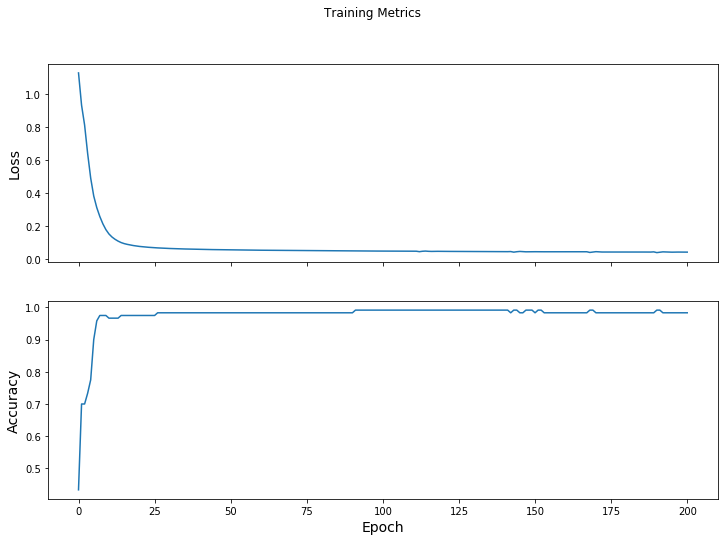

In [0]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

* Evaluons maintenant notre modèle. Pour cela, nous aurons besoin de télécharger le *test_set*  d'iris. Procédez de la même manière qu'au début de cet exercice pour insérer le csv dans un `tf.data.Dataset`

In [0]:
test_set_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

tf.keras.utils.get_file("iris_test.csv", 
                        test_set_url, 
                        cache_subdir="/content"
                        )

'/content/iris_test.csv'

In [0]:
df = pd.read_csv("iris_test.csv")
df.head()

,30,4,setosa,versicolor,virginica
0,5.9,3.0,4.2,1.5,1
1,6.9,3.1,5.4,2.1,2
2,5.1,3.3,1.7,0.5,0
3,6.0,3.4,4.5,1.6,1
4,5.5,2.5,4.0,1.3,1


In [0]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

test_set = tf.data.Dataset.from_tensor_slices((X.values, y.values))
test_set = test_set.shuffle(len(X))
test_set = test_set.batch(16)
test_set

<BatchDataset shapes: ((None, 4), (None,)), types: (tf.float64, tf.int64)>

* Testons maintenant notre modèle sur les données de test. Nous aurons besoin de boucler sur tout le dataset et calculer notre accuracy 

In [0]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_set:
  logits = model(x)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%
